# Do the sabermetric variables that demonstrate statistical significance in predicting OPS+ also exhibit predictive power for tOPS+ and sOPS+ when evaluating players in high-leverage situations? Is the Clutch Gene Real?

In this notebook, I aimed to assess the extent to which variables indicative of OPS+ (On-Base Plus Slugging Plus) are also relevant in predicting tOPS+ (Player-specific OPS+ in High Leverage Situations) and sOPS+. OPS+ serves as a league-normalized metric, with a baseline value of 100 signifying average performance. Conversely, tOPS+ is player-normalized, offering insights into a player's performance under high-leverage circumstances compared to their typical performance in other situations. A tOPS+ of 120, for instance, implies that a player's OPS in high-leverage scenarios is 20% higher than their overall OPS.

Adding another layer of complexity, we introduced sOPS+ (Split OPS+), a metric that normalizes OPS to league standards but is applied exclusively within specific splits, such as high-leverage situations. An sOPS+ of 120 indicates that a player's OPS surpasses the league average by 20% in the specified split, in this case, high-leverage moments. However, we quickly realize that this statistic doesn't provide us with any surprises.

These findings carry intriguing implications. They could shed light on particular batter attributes that contribute to heightened "clutchness." Such insights could prove invaluable for making tactical decisions, including pinch-hitting choices during critical game moments. Moreover, this investigation may unveil whether certain players possess an inherent [knack for performing exceptionally well under pressure](https://www.youtube.com/watch?v=gfanvViwILo) compared to [others](https://www.youtube.com/watch?v=Z5tK-NarwX8), hinting at the unquantifiable concept of a "clutch gene" (that I 100% believe in by the way).

Future investigations might delve deeper into player performance within specific game scenarios, such as when there are runners on base or when a runner is on third with fewer than two outs. These insights could empower coaches and managers to optimize their benches and substitution strategies for enhanced high leverage outcomes.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import statsmodels.api as sm
%matplotlib inline

The OPS numbers were all taken from [stathead](https://stathead.com/baseball/). I searched for all seasons where a batter had at least 600 plate appearances from 2015 to 2023 (all statcast-covered seasons) and took their performance in high leverage scenarios. I then added their OPS+ from a seperate search performed on stathead. 

In [2]:
#In the Regular Season, from 2015 to 2023, High Lvrge (within Leverage), requiring PA>=600 over season, sorted alphabetically (A-Z)
high = pd.read_csv("high_leverage_stats_min_600_pa_2015_2023.csv")

In [3]:
high.columns

Index(['Rk', 'Player', 'Split', 'Year', 'G', 'GS', 'PA', 'PAtot', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'ROE', 'BAbip',
       'tOPS+', 'sOPS+', 'Player-additional', 'OPS+'],
      dtype='object')

In [4]:
high = high.drop(['Rk', 'BAbip',  'Split', 'G', 'PA', 'PAtot', 'GS', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'ROE','Player-additional'], axis=1)

In [5]:
high.head()

,Player,Year,tOPS+,sOPS+,OPS+
0,CJ Abrams,2023,99,90,95
1,José Abreu,2022,98,129,134
2,José Abreu,2021,99,123,124
3,José Abreu,2019,85,101,118
4,José Abreu,2017,105,142,141


I was unsure at first whether to examine sOPS+ or tOPS+, but after examining correlations and player rankings for the respective metrics I decided to continue with both. The first list below ranks players by sOPS+. It seems overwhelmingly clear that most of the leaders are all incredible hitters who simply performed no matter the scenario. Their performance carried over to high leverage scenarios. The second list provides surprising results, as players with relatively low OPS+ numbers top the list, and the bottom of the list contains some MVPs and perennial all stars. The top four players all were below-average hitters according to OPS+. The worst clutch hitter according to tOPS+ was Jose Ramirez in 2017 (who was 3rd in MVP voting that year by the way), who had a stunning tOPS+ value of 25. At what point can we attribute such discrepancies to an unseen phenomena? Is it just a coincidence that he has a career 0.638 OPS in the playoffs, or is he simply not a clutch hitter? I decided to think of those with high tOPS+ numbers as hitters who thrive in clutch scenarios compared to regular ones, although the figure may disproportionately penalize batters with high OPS+ values. This is a potential limitation of the statistic, but in my eyes the context that these results would be applied to is pinch-hit scenarios, and pinch-hitters usually do not have incredible OPS+ numbers. If they did they would be starting.

In [6]:
sorted_high = high.sort_values(by="sOPS+", ascending=False)
print("Sorted by sOPS+\n")
print(sorted_high[["Player", "Year", "sOPS+", "tOPS+", "OPS+"]])

Sorted by sOPS+

                    Player  Year  sOPS+  tOPS+  OPS+
392          Shohei Ohtani  2021    253    175   157
452          Anthony Rizzo  2015    247    176   146
354          J.D. Martinez  2018    234    137   173
248        Carlos González  2015    229    170   116
438         Anthony Rendon  2019    224    144   157
171             Yandy Díaz  2023    223    158   158
175         Josh Donaldson  2015    218    143   151
64            Mookie Betts  2022    218    162   140
75        Charlie Blackmon  2017    217    141   141
66            Mookie Betts  2018    214    112   186
393             Matt Olson  2023    212    138   162
538             Mike Trout  2015    211    124   176
12            Ozzie Albies  2023    211    173   124
288            Eric Hosmer  2015    201    161   122
217        Freddie Freeman  2019    199    143   135
537             Mike Trout  2016    197    119   173
448          Anthony Rizzo  2019    195    142   139
462         Carlos Santana  2

In [7]:
sorted_high = high.sort_values(by="tOPS+", ascending=False)
print("Sorted by tOPS+\n")
print(sorted_high[["Player", "Year", "tOPS+", "sOPS+", "OPS+"]])

Sorted by tOPS+

                    Player  Year  tOPS+  sOPS+  OPS+
461         Carlos Santana  2021    188    157    81
358           Nomar Mazara  2017    184    181    90
534         Ezequiel Tovar  2023    182    162    77
249            Alex Gordon  2019    179    173    95
201          Wilmer Flores  2022    178    175   101
452          Anthony Rizzo  2015    176    247   146
59       Andrew Benintendi  2023    175    155    87
392          Shohei Ohtani  2021    175    253   157
12            Ozzie Albies  2023    173    211   124
248        Carlos González  2015    170    229   116
25          Brian Anderson  2018    170    183   110
261          Mitch Haniger  2021    166    188   122
42         Randy Arozarena  2021    166    194   129
64            Mookie Betts  2022    162    218   140
138          Shin-Soo Choo  2019    162    187   109
288            Eric Hosmer  2015    161    201   122
171             Yandy Díaz  2023    158    223   158
427          Albert Pujols  2

The scatter plots below show that there is a lack of correlation between OPS+ and tOPS+, whereas the OPS+ and sOPS+ comparison as well as the OPS+ and tOPS+ comparison provide rather strong and positive correlations.

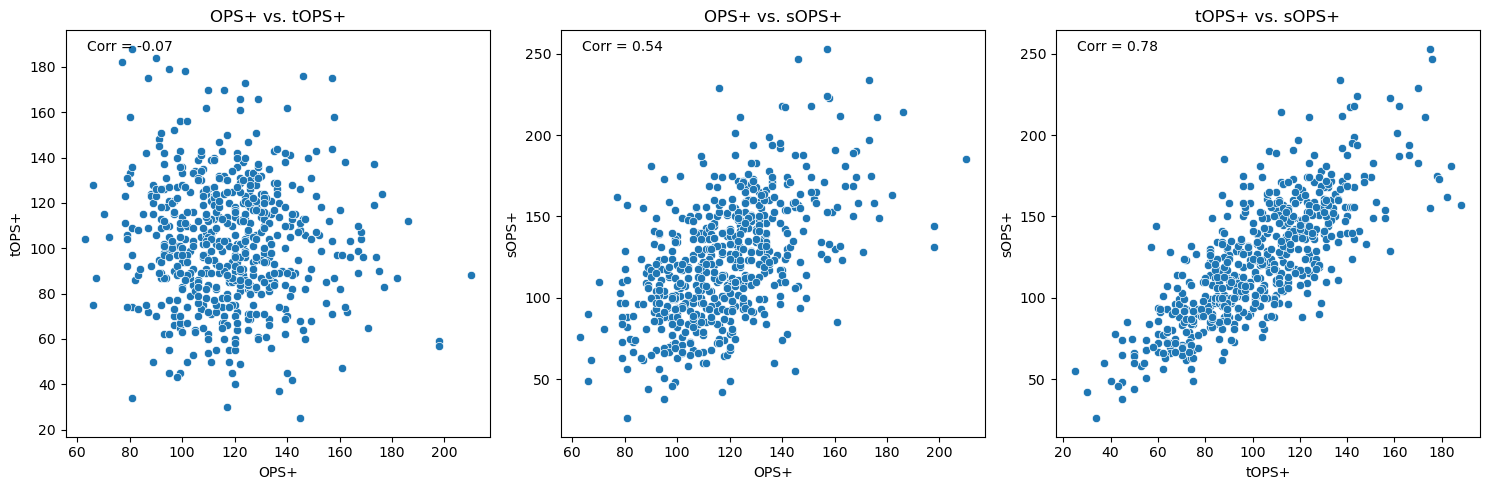

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=high, x="OPS+", y="tOPS+", ax=axes[0])
corr_0 = high[["OPS+", "tOPS+"]].corr().iloc[0, 1]
axes[0].set_title("OPS+ vs. tOPS+")
axes[0].text(0.05, 0.95, f"Corr = {corr_0:.2f}", transform=axes[0].transAxes)
sns.scatterplot(data=high, x="OPS+", y="sOPS+", ax=axes[1])
corr_1 = high[["OPS+", "sOPS+"]].corr().iloc[0, 1]
axes[1].set_title("OPS+ vs. sOPS+")
axes[1].text(0.05, 0.95, f"Corr = {corr_1:.2f}", transform=axes[1].transAxes)
sns.scatterplot(data=high, x="tOPS+", y="sOPS+", ax=axes[2])
corr_2 = high[["tOPS+", "sOPS+"]].corr().iloc[0, 1]
axes[2].set_title("tOPS+ vs. sOPS+")
axes[2].text(0.05, 0.95, f"Corr = {corr_2:.2f}", transform=axes[2].transAxes)
plt.tight_layout()

Statcast data for all the batters in the sample taken from [baseball savant](baseballsavant.mlb.com).

In [9]:
statcast = pd.read_csv("statcast_minimum_600_pa_2015_2023.csv")

In [10]:
statcast.columns

Index(['last_name, first_name', 'player_id', 'year', 'player_age', 'pa',
       'k_percent', 'bb_percent', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrel_batted_rate', 'solidcontact_percent',
       'hard_hit_percent', 'oz_contact_percent', 'iz_contact_percent',
       'whiff_percent', 'swing_percent', 'pull_percent',
       'straightaway_percent', 'opposite_percent', 'f_strike_percent',
       'groundballs_percent', 'flyballs_percent', 'linedrives_percent',
       'popups_percent', 'sprint_speed', 'Unnamed: 26'],
      dtype='object')

In [11]:
statcast = statcast.drop(['last_name, first_name', 'player_id', 'year', 'pa', 'Unnamed: 26'], axis=1)

In [12]:
df = pd.concat([high, statcast], axis=1)

In [13]:
df.head()

,Player,Year,tOPS+,sOPS+,OPS+,player_age,k_percent,bb_percent,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,hard_hit_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,sprint_speed
0,CJ Abrams,2023,99,90,95,22,19.2,5.2,87.4,13.5,32.6,6.9,7.5,35.9,62.2,83.8,22.3,53.5,35.9,39.9,24.2,64.4,44.8,25.1,20.6,9.5,28.6
1,José Abreu,2022,98,129,134,35,16.2,9.1,92.2,8.0,34.5,9.5,7.7,51.8,59.1,85.3,23.2,47.3,34.5,39.2,26.3,57.7,47.7,24.0,25.1,3.2,26.0
2,José Abreu,2021,99,123,124,34,21.7,9.3,92.0,10.4,31.2,10.2,9.2,49.3,53.8,82.6,27.7,48.4,35.1,41.3,23.6,62.3,47.3,25.6,21.7,5.3,26.5
3,José Abreu,2019,85,101,118,32,21.9,5.2,92.1,10.9,35.2,12.8,6.1,48.2,56.9,85.3,25.3,49.5,39.4,34.8,25.8,58.1,46.1,21.1,26.8,5.9,26.6
4,José Abreu,2017,105,142,141,30,17.6,5.2,90.6,11.1,34.2,9.5,7.7,45.2,59.3,86.4,22.5,48.2,34.8,38.1,27.1,57.7,44.7,20.6,28.1,6.7,26.8


Profile batters into pull, push, or straightaway hitters. This will assist when creating dummy variables in the future.

In [14]:
def categorize_hitter(row):
    highest_percent = max(row['pull_percent'], row['straightaway_percent'], row['opposite_percent'])
    if row['pull_percent'] == highest_percent:
        return 'pull'
    elif row['straightaway_percent'] == highest_percent:
        return 'straight'
    else:
        return 'opposite'
df['hitter_category'] = df.apply(categorize_hitter, axis=1)

We see that there are practically no true opposite field hitters, so I decided to drop them to create a pull dummy.

In [15]:
print(df.hitter_category.value_counts())
df = df.drop(["opposite_percent"], axis=1)
df = df[(df["hitter_category"] == "pull") | (df["hitter_category"] == "opposite")]

pull        292
straight    286
opposite      2
Name: hitter_category, dtype: int64


In [16]:
df['pull_dummy'] = (df['hitter_category'] == 'pull').astype(int)

Here the regressions are ran. The R-squared for the tOPS+ model is rather low at 0.114. Additionally, the sOPS+ regression also results in a low R-squared value of 0.293, but the exact same variables result in an R-squared of 0.711 when predicting OPS+, highlighting a clear distinction.

In [17]:
y = df["tOPS+"]
X = df.drop(["Player", "Year", "tOPS+", "sOPS+", "OPS+", "straightaway_percent", "linedrives_percent", "hitter_category", "pull_percent", "popups_percent"], axis=1)
X = sm.add_constant(X)
model_tops = sm.OLS(y, X).fit()
print(model_tops.summary())

                            OLS Regression Results                            
Dep. Variable:                  tOPS+   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.957
Date:                Sat, 07 Oct 2023   Prob (F-statistic):             0.0123
Time:                        02:20:34   Log-Likelihood:                -1377.0
No. Observations:                 294   AIC:                             2792.
Df Residuals:                     275   BIC:                             2862.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  165.2729 

In [18]:
y = df["sOPS+"]
X = df.drop(["Player", "Year", "tOPS+", "sOPS+", "OPS+", "straightaway_percent", "linedrives_percent", "hitter_category", "pull_percent", "popups_percent"], axis=1)
X = sm.add_constant(X)
model_sops = sm.OLS(y, X).fit()
print(model_sops.summary())

                            OLS Regression Results                            
Dep. Variable:                  sOPS+   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     6.325
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.26e-13
Time:                        02:20:35   Log-Likelihood:                -1428.3
No. Observations:                 294   AIC:                             2895.
Df Residuals:                     275   BIC:                             2965.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -387.9116 

In [19]:
y = df["OPS+"]
X = df.drop(["Player", "Year", "tOPS+", "sOPS+", "OPS+", "straightaway_percent", "linedrives_percent", "hitter_category", "pull_percent", "popups_percent"], axis=1)
X = sm.add_constant(X)
model_ops = sm.OLS(y, X).fit()
print(model_ops.summary())

                            OLS Regression Results                            
Dep. Variable:                   OPS+   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.94e-63
Time:                        02:20:35   Log-Likelihood:                -1138.3
No. Observations:                 294   AIC:                             2315.
Df Residuals:                     275   BIC:                             2385.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -349.2661 

In [20]:
tops_series = pd.Series(model_tops.params)
ops_series = pd.Series(model_ops.params)
sops_series = pd.Series(model_sops.params)
coefficients_tops_df = pd.DataFrame([tops_series, ops_series])
coefficients_sops_df = pd.DataFrame([sops_series, ops_series])

In [21]:
variables = model_ops.params.index.to_list()
ops_coefficients = model_ops.params.to_list()
tops_coefficients = model_tops.params.to_list()
sops_coefficients = model_sops.params.to_list()
coefficients_tops_df = pd.DataFrame({"Variable": variables, "OPS+ Coefficient Value": ops_coefficients, "tOPS+ Coefficient Value": tops_coefficients})
coefficients_sops_df = pd.DataFrame({"Variable": variables, "OPS+ Coefficient Value": ops_coefficients, "sOPS+ Coefficient Value": sops_coefficients})

In [22]:
significant_tops = ["F", "F", "F", "F", "T", "F", "T", "T", "F", "T", "F", "F", "F", "F", "F", "F", "T", "T", "F"]
significant_ops = ["T", "F", "T", "T", "F", "F", "T", "T", "F", "F", "T", "T", "T", "F", "F", "F", "F", "T", "F"]
significant_sops = ["F", "F", "F", "T", "F", "F", "T", "F", "F", "T", "T", "F", "F", "F", "F", "F", "F", "F", "F"]
coefficients_tops_df["OPS+ Significance"] = significant_ops
coefficients_sops_df["OPS+ Significance"] = significant_ops
coefficients_tops_df["tOPS+ Significance"] = significant_tops
coefficients_sops_df["sOPS+ Significance"] = significant_sops

In [23]:
coefficients_tops_df["Absolute Difference"] = coefficients_tops_df["tOPS+ Coefficient Value"] - coefficients_tops_df["OPS+ Coefficient Value"]
coefficients_sops_df["Absolute Difference"] = coefficients_sops_df["sOPS+ Coefficient Value"] - coefficients_sops_df["OPS+ Coefficient Value"]

In [24]:
coefficients_tops_df["% Difference OPS+ to tOPS+"] = coefficients_tops_df.apply(
    lambda row: f"{round(abs(100 * (row['tOPS+ Coefficient Value'] - row['OPS+ Coefficient Value']) / row['OPS+ Coefficient Value']))}%",
    axis=1
)
coefficients_sops_df["% Difference OPS+ to sOPS+"] = coefficients_sops_df.apply(
    lambda row: f"{round(abs(100 * (row['sOPS+ Coefficient Value'] - row['OPS+ Coefficient Value']) / row['OPS+ Coefficient Value']))}%",
    axis=1
)

The table below provides information for each variable in the tOPS+ and OPS+ regressions. 9 variables were significant (at a 5% level) for the OPS+ regression, compared to 6 for the tOPS+ regression. There are 3 variables that were significant in both regression models (sweet spot percentage, barrel batted rate, sprint speed). Two of these significant variables differed in terms of their sign, as both sprint speed and barrel batted rate were positive for OPS+ but negative for tOPS+.

In [25]:
coefficients_tops_df

,Variable,OPS+ Coefficient Value,tOPS+ Coefficient Value,OPS+ Significance,tOPS+ Significance,Absolute Difference,% Difference OPS+ to tOPS+
0,const,-349.266075,165.272929,T,F,514.539003,147%
1,player_age,-0.264071,0.041166,F,F,0.305237,116%
2,k_percent,-2.124467,0.820687,T,F,2.945153,139%
3,bb_percent,2.053701,0.465968,T,F,-1.587733,77%
4,exit_velocity_avg,0.408492,-5.236260,F,T,-5.644753,1382%
5,launch_angle_avg,1.128838,2.020169,F,F,0.891332,79%
6,sweet_spot_percent,1.714956,1.585033,T,T,-0.129923,8%
7,barrel_batted_rate,3.242152,-2.598654,T,T,-5.840806,180%
8,solidcontact_percent,0.518814,-1.868459,F,F,-2.387274,460%
9,hard_hit_percent,0.604189,2.616526,F,T,2.012337,333%


The table below provides information for each variable in the sOPS+ and OPS+ regressions. 9 variables were significant (at a 5% level) for the OPS+ regression, compared to 4 for the sOPS+ regression. There are 3 variables that were significant in both regression models (base on balls percentage, sweet spot percentage and outside zone contact percentage). All of the aformentioned variables have the same sign unlike the regression on tOPS+.

In [26]:
coefficients_sops_df

,Variable,OPS+ Coefficient Value,sOPS+ Coefficient Value,OPS+ Significance,sOPS+ Significance,Absolute Difference,% Difference OPS+ to sOPS+
0,const,-349.266075,-387.911609,T,F,-38.645535,11%
1,player_age,-0.264071,-0.210942,F,F,0.053129,20%
2,k_percent,-2.124467,-1.090360,T,F,1.034106,49%
3,bb_percent,2.053701,2.507571,T,T,0.453870,22%
4,exit_velocity_avg,0.408492,-3.631863,F,F,-4.040355,989%
5,launch_angle_avg,1.128838,3.386305,F,F,2.257467,200%
6,sweet_spot_percent,1.714956,3.501930,T,T,1.786974,104%
7,barrel_batted_rate,3.242152,0.834869,T,F,-2.407283,74%
8,solidcontact_percent,0.518814,-0.812683,F,F,-1.331498,257%
9,hard_hit_percent,0.604189,2.759565,F,T,2.155376,357%


Obviously this experiment was not perfect. There are very many extensions that could be pursued. Perhaps including the amount of all stars in a lineup, the amount of wins a team achieved, the specific clutch situation, and other factors among many could provide more accuracy and highlight why some batters simply hit better in clutch situations compared to others. A couple of variables are still rather confusing in nature. Why do faster runners tend to be less clutch? Why do batters with higher barrel batted rates perform worse in the clutch? There are so many things that could cause these trends, such as fielding positions, situational hitting, pitchers and pitchtypes, etc. Currently, we lack a quantifiable bridge to cross the gap and fully explain the contrast between clutch players and those who seem to falter in crucial moments. This leads to a belief that some players possess an innate "clutch gene." It is evident that predicting a batter's clutch performance is a far more intricate task compared to forecasting their overall performance, whether we base it on comparisons to league averages or personal averages. Ultimately, this conundrum persists, whether due to the absence of a conveniently omitted statistic or metric that could explain the variability in our sOPS+ and tOPS+ measures, or because some players simply embody that unquantifiable quality often referred to as having ["that dawg in them."](https://www.urbandictionary.com/define.php?term=Got%20that%20dawg%20in%20him).